In [2]:
from pathlib import Path
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.impute import SimpleImputer
import numpy as np 

# 2 - EDA


In [3]:
df = pd.read_csv("./assets/data_warehouse/salaries.csv")
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,PensionDebt,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,NaN,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,NaN,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,NaN,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,NaN,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,NaN,326373.19,2011,San Francisco


In [4]:
df.describe(include='all')

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,PensionDebt,TotalPayBenefits,Year,Agency
count,478960.000000,478960,478960,478960.000000,478960.000000,478960.000000,478960.000000,478960.000000,121553.000000,478960.000000,478960.000000,478960
unique,NaN,144814,2539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,Kevin Lee,Transit Operator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,San Francisco
freq,NaN,51,28874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,478960
mean,239480.500000,NaN,NaN,75469.817047,6449.248849,3725.357381,25047.555482,85644.423277,459.950960,110808.707544,2016.649701,NaN
std,138263.986802,NaN,NaN,49744.859572,14962.917669,7673.620109,17586.150048,58617.365928,1617.708215,73828.224499,3.404724,NaN
min,1.000000,NaN,NaN,-9942.330000,-22453.280000,-7058.590000,-13939.420000,-618.130000,-1.140000,-3628.780000,2011.000000,NaN
25%,119740.750000,NaN,NaN,39682.085000,0.000000,0.000000,5883.845000,43499.947500,0.000000,55179.427500,2014.000000,NaN
50%,239480.500000,NaN,NaN,73161.025000,4.000000,776.800000,29050.940000,81116.020000,0.000000,108797.740000,2017.000000,NaN
75%,359220.250000,NaN,NaN,107167.102500,5801.395000,4312.050000,36926.007500,120376.735000,0.000000,155681.512500,2020.000000,NaN


### Comments 
* 478 000 lines
* Max TotalPayBenefits = 763 000 $
* Min TotalPayBenefits in negative => double check
* ...

## 2.1 - Form analysis

### 2.1.1 - Summary

Question                             | Value                        | Comment
---                                  |:---:                         | ---: 
Target identification                | TotalPayBenefits             | study over time
Number of rows                       | 478 960                      |
Number of columns                    | 12                           | Initially, see below the recommendations
Number of dimension                  | 2                            |
Types of variables                   | int64:2 float64:7 object:3   |
Nb of discrete variables             | Years, 11                    | From 2011 to 2022 
Nb of discrete variables             | EmployeeName, 113 511        | `SHOULD BE REMOVED`
Nb of discrete variables             | JobTitle, 1 810              | 
Nb of discrete variables             | Agency, 478 960              | Constant = "San Francisco", `SHOULD BE REMOVED`
Nb of continuous variables           | 8                            | Id	BasePay	OvertimePay	OtherPay	Benefits	TotalPay	PensionDebt	TotalPayBenefits		
Identification of the missing values | PensionDebt (74%)            | Because the feature is available since 2020




                                     

Please find below how the values of the hereabove array have been determined.

### 2.1.2 - Shape & dim

In [5]:
# La forme
print(df.shape)
print(df.ndim)

(478960, 12)
2


### 2.1.3 - Data type

In [6]:
# La forme : les type de données
print(df.dtypes)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
PensionDebt         float64
TotalPayBenefits    float64
Year                  int64
Agency               object
dtype: object


### 2.1.4 - Numbers of differents data types

In [7]:
df.dtypes.value_counts()

float64    7
object     3
int64      2
Name: count, dtype: int64

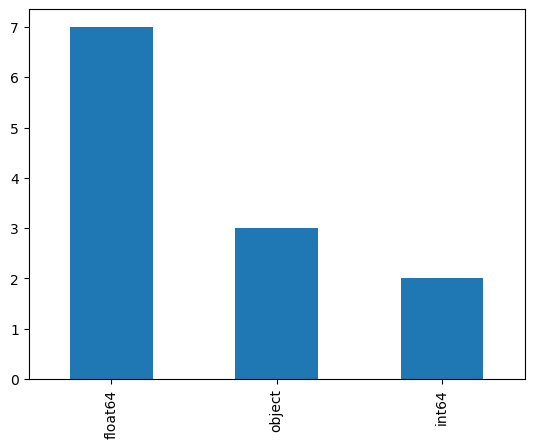

In [8]:
_ = df.dtypes.value_counts().plot.bar()

### 2.1.5 - Number of different names

* All the names in upper case
* Get the data globally but also per year ?

In [9]:
df["EmployeeName"] = df["EmployeeName"].str.upper()
list_of_names = df.groupby("EmployeeName")["Id"].nunique()
print(list_of_names.head(10))
print("\nNumber of uniques names : ", len(list_of_names))

# TODO : We should clean up double spaces in EmployeeName/JobTitle to avoid duplicate

EmployeeName
A BERNARD  FATOOH          1
A BERNARD FATOOH          10
A ELIZABETH MARCHASIN      1
A GOCHEZ                   3
A JAMIL NIAZI              1
A K FINIZIO                8
A'MARI I COLEMAN           2
A. JAMES  ROBERTSON II     1
A. JAMES ROBERTSON II      4
A.K.  FINIZIO              1
Name: Id, dtype: int64

Number of uniques names :  113511


### 2.1.6 - Number of different JobTitle 

* All the job title in upper case
* Get the data globally but also per year ?

In [10]:
df["JobTitle"] = df["JobTitle"].str.upper()
list_of_names = df.groupby("JobTitle")["Id"].nunique()
print(list_of_names.head(10))
print("\nNumber of uniques job title : ", len(list_of_names))

JobTitle
ACCOUNT CLERK                    807
ACCOUNTANT                         5
ACCOUNTANT I                      19
ACCOUNTANT II                    674
ACCOUNTANT II (OCII)               3
ACCOUNTANT III                  1357
ACCOUNTANT III (OCII)              2
ACCOUNTANT INTERN                332
ACCOUNTANT IV                    735
ACCOUNTING SUPERVISOR (OCII)       3
Name: Id, dtype: int64

Number of uniques job title :  1810


### 2.1.7 - Missing values
Only in PensionDebt (74%)

In [11]:
df.isna().sum() / len(df) * 100

Id                   0.000000
EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.000000
OvertimePay          0.000000
OtherPay             0.000000
Benefits             0.000000
TotalPay             0.000000
PensionDebt         74.621472
TotalPayBenefits     0.000000
Year                 0.000000
Agency               0.000000
dtype: float64

## 2.2 - Background analysis


### 2.2.1 Summary of the background analysis

Question                              | Value                                                 | Comment
---                                   |:---:                                                  | ---: 
Eliminate unnecessary columns         | Delete EmployeeName and Agency rows (see above why)   |
Eliminate unnecessary columns         | Delete Id row because it brings no information        |
Replace Nan in continuous features    |                                                       |
Remove lines full of 0                |                                                       |
Run cross correlation                 | Identify and delete highly correlated features        | Triangle with values
Understanding the target              |                                                       | 
Visualize the target                  | View TotalPayBenefits over time                       | Domain info from domain experts
Visualize the target                  | Mean and Std of the target over time                  |
Understanding the different variables | Look the number of JobTitle over time                 | List the differents jobtitle
Understanding the different variables |                                                       | List the jobtitle per year ? Any move, change, trend ?
Understanding the different variables |                                                       | Bar graph with jobtitle ?
Understanding the different variables |                                                       |


### 2.2.2 Eliminate unnecessary columns

Delete EmployeeName and Agency features 

In [12]:
df.drop(columns=["Id", "EmployeeName", "Agency"], inplace=True)
print(df.shape)
print(df.ndim)
print(df.head())

(478960, 9)
2
                                         JobTitle    BasePay  OvertimePay  \
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18         0.00   
1                 CAPTAIN III (POLICE DEPARTMENT)  155966.02    245131.88   
2                 CAPTAIN III (POLICE DEPARTMENT)  212739.13    106088.18   
3            WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00     56120.71   
4    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60      9737.00   

    OtherPay  Benefits   TotalPay  PensionDebt  TotalPayBenefits  Year  
0  400184.25       0.0  567595.43          NaN         567595.43  2011  
1  137811.38       0.0  538909.28          NaN         538909.28  2011  
2   16452.60       0.0  335279.91          NaN         335279.91  2011  
3  198306.90       0.0  332343.61          NaN         332343.61  2011  
4  182234.59       0.0  326373.19          NaN         326373.19  2011  


### 2.2.3 - Replace Nan in continuous features 

In [13]:
imputer1 = SimpleImputer(missing_values = np.NaN, strategy="constant", fill_value=0)
df.PensionDebt = imputer1.fit_transform(df.PensionDebt.values.reshape(-1,1))
print(df.head())

                                         JobTitle    BasePay  OvertimePay  \
0  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  167411.18         0.00   
1                 CAPTAIN III (POLICE DEPARTMENT)  155966.02    245131.88   
2                 CAPTAIN III (POLICE DEPARTMENT)  212739.13    106088.18   
3            WIRE ROPE CABLE MAINTENANCE MECHANIC   77916.00     56120.71   
4    DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)  134401.60      9737.00   

    OtherPay  Benefits   TotalPay  PensionDebt  TotalPayBenefits  Year  
0  400184.25       0.0  567595.43          0.0         567595.43  2011  
1  137811.38       0.0  538909.28          0.0         538909.28  2011  
2   16452.60       0.0  335279.91          0.0         335279.91  2011  
3  198306.90       0.0  332343.61          0.0         332343.61  2011  
4  182234.59       0.0  326373.19          0.0         326373.19  2011  


### 2.2.4 - Delete any line full of 0 if any

In [14]:
print(df.shape)

indexNames = df[  (df['BasePay']          == 0) &
                  (df['OvertimePay']      == 0) &
                  (df['OtherPay']         == 0) &
                  (df['Benefits']         == 0) &
                  (df['TotalPay']         == 0) &
                  (df['TotalPayBenefits'] == 0)
                ].index
df.drop(indexNames , inplace=True)

print(df.shape)


(478960, 9)
(476513, 9)


### 2.2.5 - Run cross correlation

<Axes: >

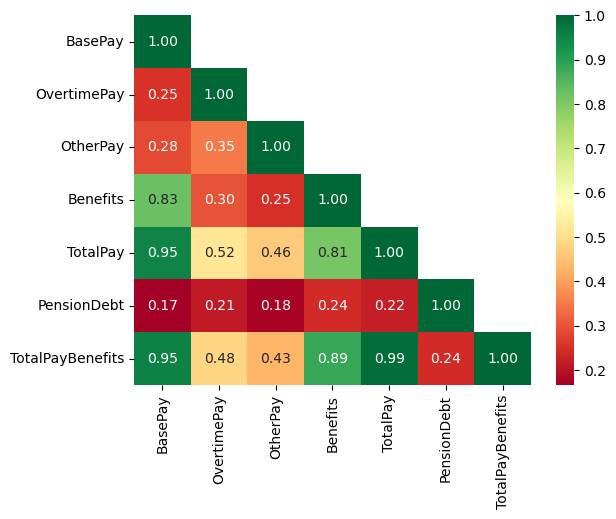

In [15]:
subdf = df[["BasePay", "OvertimePay", "OtherPay", "Benefits", "TotalPay", "PensionDebt", "TotalPayBenefits"]].copy()

mask = np.triu(np.ones_like(subdf.corr()))
mask[np.diag_indices_from(mask)] = False
sns.heatmap(subdf.corr(),annot=True, fmt='.2f', cmap='RdYlGn', mask=mask)


### Comment
* TotalPayBenefits and BasePay are closely related. Indeed, as %, BasePay is a big chunck of TotalPayBenefits
* For the same reason, TotalPayBenefits and TotalPay are closely related.  
* In first approximation we keep the features as they are so far
* In a future version of the model we could decide to only keep TotalPayBenefits and get rid of TotalPay and BasePay

### 2.2.3 - Understanding the target
 

* There is only one target TotalPayBenefits
* However it seems important to explain the relation between TotalPayBenefits and TotalPay
* Remember the formulas
```
Total Pay = Base Pay + Overtime Pay + Other Pay 
Total Pay & Benefits = Total Pay + Benefits + Pension Debt 
```
* Since TotalPayBenefits include TotalPay, in the remaining of the discussion we will focus solely on `TotalPayBenefits`
* In a real business case, this section should be completed with information from domain expert and the Web

### 2.2.4 - Visualize the target

* Look at the target over time

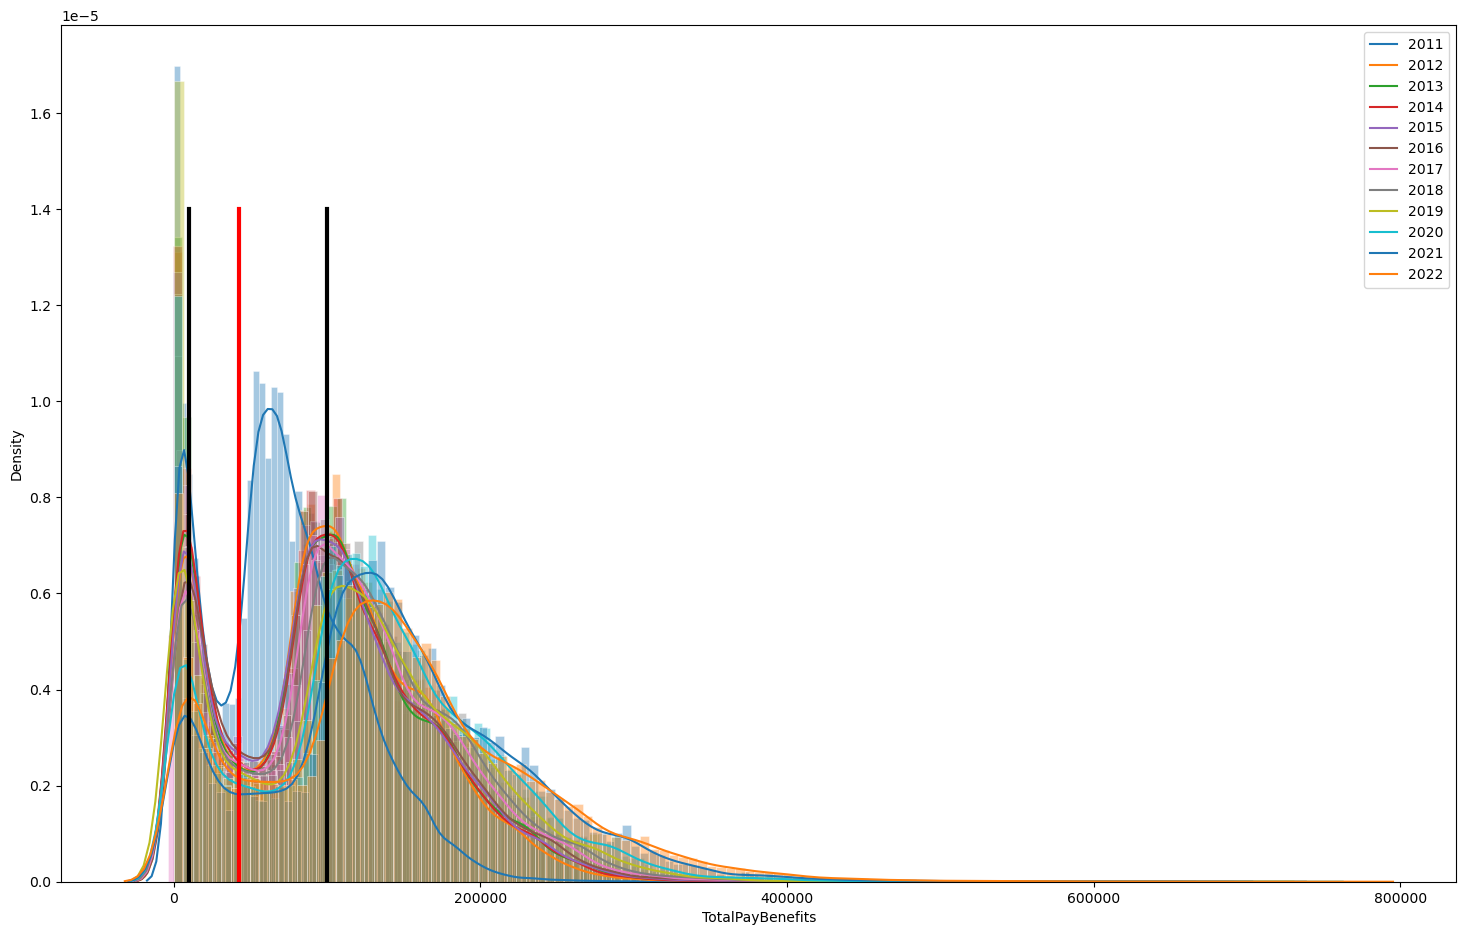

In [25]:
plt.figure(figsize=(18, 18/1.618))
plt.title = "TotalPayBenefits distribution over time"
for year in range(2011,2022+1):
  current_df = df[df["Year"]==year]
  sns.histplot(data=current_df, x='TotalPayBenefits', kde=True, legend=year, stat="density", kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))

_ = plt.legend(labels=["2011","2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022"]) 
_ = plt.plot([42500, 42500], [0, 1.4e-5], c="red", linewidth=3)

_ = plt.plot([100000, 100000], [0, 1.4e-5], c="black", linewidth=3)
_ = plt.plot([10000, 10000], [0, 1.4e-5], c="black", linewidth=3)


### Comments
* There are 2 peaks (2 modes)
* The first one (low TotalPayBenefits) seems to NOT evolve over time
* The second one move forward over time
* The height of the second peak decrease over time (less people with high revenues)
* The valley between both peaks move forward and lower with time


### 2.2.5 - Mean and Std of the target over time

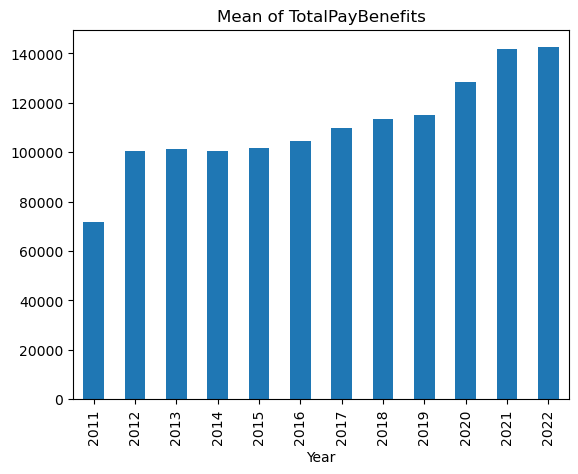

In [17]:
MySerie = df.groupby(["Year"])["TotalPayBenefits"].mean()
_ = MySerie.plot.bar(title="Mean of TotalPayBenefits")

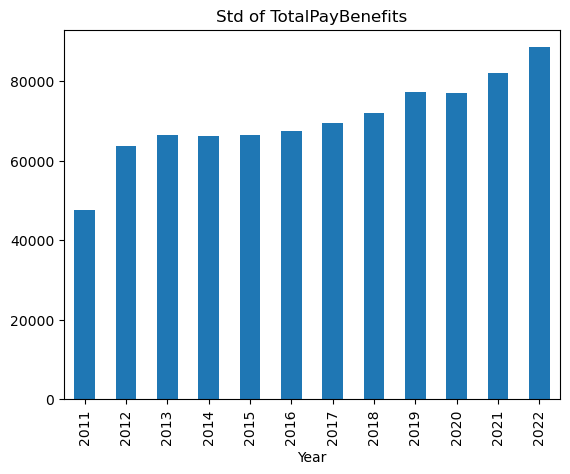

In [18]:
MySerie = df.groupby(["Year"])["TotalPayBenefits"].std()
_ = MySerie.plot.bar(title="Std of TotalPayBenefits")


Mean :  1.5731170166292399
Std  :  0.06988602869403181


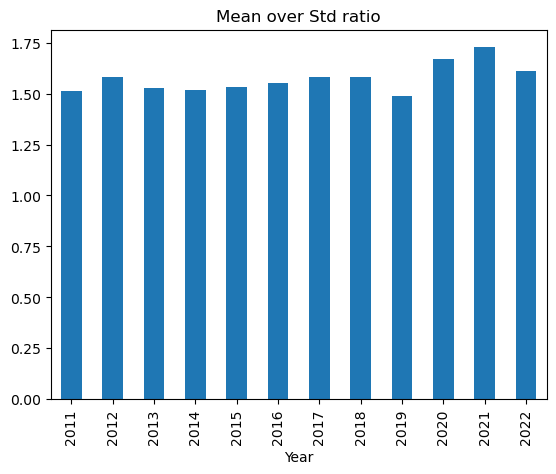

In [19]:
MySerie = df.groupby(["Year"])["TotalPayBenefits"].mean()/df.groupby(["Year"])["TotalPayBenefits"].std()
_ = MySerie.plot.bar(title="Mean over Std ratio")

print()
print("Mean : ", MySerie.mean())
print("Std  : ", MySerie.std())

### Comments
* Mean and Standard Deviation evolve similarly
* The ratio remains around 1.5 for the last 12 years


### 2.2.6 - Discrete variables

* Number of JobTitle over time



Mean :  1023.5
Std  :  25.745255520545566


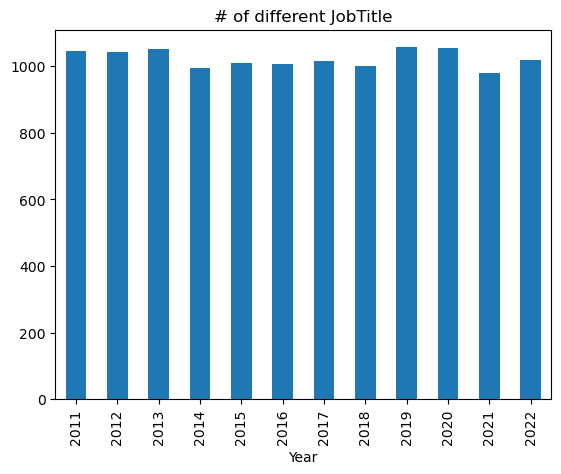

In [20]:
MySerie = df.groupby(["Year"])["JobTitle"].nunique()
_ = MySerie.plot.bar(title="# of different JobTitle")

print()
print("Mean : ", MySerie.mean())
print("Std  : ", MySerie.std())

### Comments
We will come back to this topic at the end of the modelisation. It could be usefull to dig in and to :
* List of the differents JobTitle ?
* List the JobTitle per year ?
* Any move, change, trend ?
* ...        

## 2.3 - Save the csv file for modelisation

In [21]:
df.head(100)

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,PensionDebt,TotalPayBenefits,Year
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,0.0,567595.43,2011
1,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,0.0,538909.28,2011
2,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,0.0,335279.91,2011
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,0.0,332343.61,2011
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,0.0,326373.19,2011
...,...,...,...,...,...,...,...,...,...
95,MANAGER VIII,215180.76,0.00,12000.00,0.0,227180.76,0.0,227180.76,2011
96,ANESTHETIST,208925.60,5539.30,12615.60,0.0,227080.50,0.0,227080.50,2011
97,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.67,35402.71,22261.95,0.0,226357.33,0.0,226357.33,2011
98,FIRE FIGHTER PARAMEDIC,122404.98,86719.38,15315.61,0.0,224439.97,0.0,224439.97,2011


In [22]:
directory_out = "/assets/data_warehouse/"
name_out = "salaries_4_model.csv"

# __file__ is NOT defined in Jupyter notebook
# current_dir = Path(__file__).parent
current_dir = os.path.abspath("")
filename_out = current_dir + directory_out + name_out

filepath = Path(filename_out)
df.to_csv(filepath, index=False,sep = ";", decimal= ",")

## 2.4 - TO BE DELETED

In [23]:
# Sanity check
# Count the number of lines of the final csv file
directory_in = "./assets/data_lake"
total_len=0

for path in Path(directory_in).iterdir():
    if path.is_file() and path.suffix == ".csv":
      current_df = pd.read_csv(path)
      current_len = len(current_df) 
      total_len += current_len
      print (f"{path.name} : {current_len} {total_len}") 


san-francisco-2011.csv : 36159 36159
san-francisco-2012.csv : 36766 72925
san-francisco-2013.csv : 37606 110531
san-francisco-2014.csv : 38119 148650
san-francisco-2015.csv : 39387 188037
san-francisco-2016.csv : 40970 229007
san-francisco-2017.csv : 41566 270573
san-francisco-2018.csv : 42309 312882
san-francisco-2019.csv : 44525 357407
san-francisco-2020.csv : 40944 398351
san-francisco-2021.csv : 39706 438057
san-francisco-2022.csv : 40903 478960


### Ideas
* Visualize feature-target relationships 
    * Think about making sub-categories 
        * boolean indexing. Ex: blood_columns = df.columns[(missing_rate < .9) & (missing_rate>0.88)]
        * To display the feature-target relationship for each element in the sub-category
    * histo, boxplot depending on whether target is continuous/discrete and variable is continuous/discrete
    * think of sns.countplot() with hue="MyTarget".
    * If you have 2 discretes, use pd.crosstab() & sns.heatmap(pd.crosstab...)
* Identify outliers
